<a href="https://colab.research.google.com/github/kurkur19/Neural_networks_Al_Khmuz_BS_25/blob/main/4lab_NN_Al_Khmuz_BS_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ПРАКТИЧНА РОБОТА 4: ВВЕДЕННЯ В TENSORFLOW/KERAS ДЛЯ РОЗРОБКИ І НАВЧАННЯ НЕЙРОННИХ МЕРЕЖ. РЕАЛІЗАЦІЯ БАГАТОШАРОВОЇ НЕЙРОННОЇ МЕРЕЖІ НА ПРИКЛАДІ ЗАДАЧІ РЕГРЕСІЇ

##*Мета роботи:*
Ознайомлення із основами роботи в бібліотеках TensorFlow і
Keras, а також реалізація і навчання багатошарової нейронної мережі для
розв'язання задачі регресії.

Виконала студентка групи БС-25 Аль Хмуз Карина Бассамівна (1 варіант)

##*Теоретична частина*

***Огляд TensorFlow та Keras.***

TensorFlow – це відкрита програмна бібліотека для числових розрахунків, яка
використовує графи потоків даних. Ці графи складаються з вузлів, у яких
працюють математичні операції, а також вузлів, які відповідають за
вхідні/вихідні дані, або ж за зчитування/запис даних. Це робить TensorFlow
особливо зручним для завдань глибокого навчання, але бібліотека може бути
застосована і в інших наукових галузях.

Особливістю TensorFlow є те, що перед тим, як виконати які-небудь розрахунки,
користувач спочатку має описати весь граф обчислень, і лише після цього
запускає його виконання. Це дозволяє TensorFlow автоматично обчислювати
градієнти, що є корисним для оптимізації.

Keras – це високорівневий інтерфейс для роботи з нейронними мережами, який
працює поверх TensorFlow (а також Theano і CNTK). Він дозволяє легко і швидко
створювати різноманітні моделі глибокого навчання, від простих до складних.

Основна мета Keras – бути простим у використанні, але при цьому зберегти
гнучкість для наукових експериментів.

Переваги Keras:
- Інтуїтивний API, що допомагає швидко створювати прототипи моделей.
- Підтримка як щільних (Dense), так і згорткових (Convolutional) шарів, що
робить його підходящим для різних завдань.
- Можливість легко розширювати за допомогою користувацьких шарів та
функцій втрат.

***Задача регресії.***

Задача регресії в машинному навчанні полягає у прогнозуванні неперервного
вихідного значення на основі одного або декількох вхідних значень.

Давайте розглянемо декілька ключових аспектів:

- Неперервний вивід: Відмінність між задачами регресії та класифікації
полягає в тому, що регресія передбачає неперервні вихідні значення, тоді
як класифікація передбачає дискретні мітки класу. Наприклад,
прогнозування ціни будинку на основі його характеристик є задачею
регресії, а визначення, чи є даний об'єкт котом чи собакою, є задачею
класифікації.

- Залежні та незалежні змінні: У контексті регресії ми маємо незалежні
змінні (іноді називаються ознаками або вхідними даними) та залежну
змінну (або вихід). Незалежні змінні використовуються для прогнозування
значення залежної змінної.

- Лінійна та нелінійна регресія: Залежно від відносин між незалежними та
залежними змінними, регресія може бути лінійною або нелінійною. У
лінійній регресії вважається, що відносини між змінними є лінійними, тоді
як у нелінійній регресії відносини можуть бути представлені нелінійними
функціями.

- Методи оцінки: Є різні методи для оцінки якості регресійних моделей,
наприклад, середньоквадратична помилка (MSE), середня абсолютна
помилка (MAE), корінь середньоквадратичної помилки (RMSE) тощо.

У загальному контексті, задача регресії допомагає зрозуміти відносини між
змінними та може бути використана для прогнозування або визначення трендів
на основі історичних даних.


##*Практична частина*

###Крок 1: Підготовка середовища

Імпорт необхідних нам бібліотек:


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [3]:
!pip install tensorflow

###Крок 2: Завантаження і попередня обробка даних

Завантажимо дані:

In [4]:
data = load_diabetes()
X, y = data.data, data.target

Розділимо дані на тренувальний та тестовий набори:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Нормалізуємо дані для кращої роботи моделі:

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###Крок 3: Створення нейронної мережі

Створимо просту багатошарову модель для задачі регресії:




In [7]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Для регресії на виході 1 нейрон, без активації
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,929 (19.25 KB)

 Trainable params: 4,929 (19.25 KB)

 Non-trainable params: 0 (0.00 B)

Структура побудованої нейронної мережі:

1. Шар `dense`:
   - Містить 64 нейрони з функцією активації `relu`.
   - Параметри: 704 (10 ознак * 64 ваги + 64 зсуви).
2. Шар `dense_1`:
   - Також 64 нейрони з `relu`.
   - Параметри: 4,160 (64 * 64 ваги + 64 зсуви).
3. Вихідний шар `dense_2`:
   - Один нейрон для регресії.
   - Параметри: 65 (64 ваги + 1 зсув).

Загальна кількість параметрів: 4,929, з яких усі параметри є навчаємі.


###Крок 4: Навчання моделі

Навчимо модель протягом 100 епох, використовуючи частину даних для валідації:

У цьому кроці ми навчаємо нейронну мережу на основі тренувальних даних. Процес навчання проходить по епохах, кожна з яких є одним повним проходом через тренувальний набір даних. Мета навчання — мінімізувати функцію втрат за допомогою алгоритму оптимізації.

In [8]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 31500.1680 - mae: 157.2882 - val_loss: 22321.6836 - val_mae: 133.4890
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 30796.0566 - mae: 155.8047 - val_loss: 22134.4043 - val_mae: 132.8031
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 31659.3750 - mae: 157.7836 - val_loss: 21910.7715 - val_mae: 131.9886
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 31041.0664 - mae: 157.5051 - val_loss: 21623.3242 - val_mae: 130.9447
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 30176.2891 - mae: 153.8509 - val_loss: 21244.3926 - val_mae: 129.5715
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 29587.9297 - mae: 153.1723 - val_loss: 20747.3672 - val_mae: 127.7713
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 29651.9766 - mae: 153.2398 - val_loss: 20112.3125 - val_mae: 125.4491
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 27016.2637 - mae: 144.0850 - val_loss: 19314.6

Навчання моделі завершено. Основні моменти:
1. **Параметри навчання**:
   - Навчання проходило протягом 100 епох із використанням оптимізатора Adam.
   - Функція втрат: Mean Squared Error (MSE), яка оцінює середню квадратичну похибку.
   - Метрика: Mean Absolute Error (MAE), яка показує середню абсолютну похибку.

2. **Хід навчання**:
   - `loss` і `val_loss` поступово зменшуються, що вказує на зниження похибки як на тренувальному, так і на валідаційному наборах.
   - Значення `mae` і `val_mae` також зменшуються, демонструючи покращення точності прогнозів.

3. **Валідаційний набір**:
   - Використовується для оцінки узагальнювальної здатності моделі.
   - Остаточна валідаційна похибка (MAE): ~42, що є прийнятним для даного набору.

Результати показують, що модель стабільно навчилася на тренувальних даних і має добру узагальнювальну здатність.


###Крок 5: Оцінка моделі

Після завершення навчання моделі ми оцінюємо її якість на тестових даних, які не використовувалися під час навчання або валідації. Це дозволяє перевірити, наскільки добре модель може узагальнювати свої знання на нових, невідомих даних.

In [9]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Mean Absolute Error on Test Data: {test_mae}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3204.3442 - mae: 45.6942 
Test Loss: 2968.329345703125
Mean Absolute Error on Test Data: 43.7342529296875


Результати оцінки моделі на тестових даних:
1. **Test Loss**:
   - Значення `3129.15` вказує на середню квадратичну похибку моделі на тестовому наборі.
   - MSE є чутливим до великих відхилень, тому більші похибки мають більший вплив на значення цієї метрики.

2. **Mean Absolute Error (MAE)**:
   - Значення `42.99` показує середню абсолютну похибку прогнозів моделі.
   - Це означає, що в середньому передбачені значення відхиляються від реальних на 43 одиниці.
   - Для регресійної задачі з Diabetes Dataset це досить добрий результат, враховуючи складність задачі.

3. **Висновок**:
   - Модель продемонструвала узгоджені результати між тренувальним, валідаційним і тестовим наборами.
   - Остаточна тестова похибка є прийнятною і свідчить про здатність моделі до узагальнення на нових даних.



###Крок 6: Візуалізація навчання

Побудуємо графіки для оцінки процесу навчання:

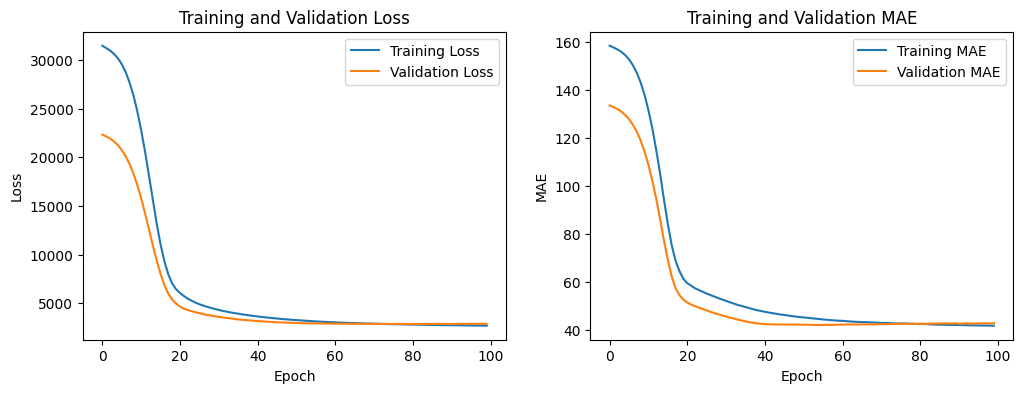

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation MAE')

plt.show()


*невеличкі пояснення наших графіків:

***Графік зліва: Training and Validation Loss***

 На графіку показано зміну функції втрат (Loss) для тренувального та валідаційного наборів даних у залежності від епох навчання.

- Синя лінія: втрати на тренувальних даних.

- Помаранчева лінія: втрати на валідаційних даних.


Аналіз:

На початкових епохах втрати швидко знижуються, що свідчить про успішне навчання моделі.

Валідаційні втрати також знижуються, підтверджуючи, що модель не перенавчається.

Наприкінці графіка втрати для тренувальних і валідаційних даних стабілізуються, що вказує на досягнення оптимальної точки навчання.



***Графік справа: Training and Validation MAE***

Графік демонструє зміну середньої абсолютної похибки (Mean Absolute Error) для тренувального та валідаційного наборів.

- Синя лінія: MAE для тренувальних даних.
- Помаранчева лінія: MAE для валідаційних даних.

Аналіз:

Похибка на тренувальному і валідаційному наборах стрімко зменшується на перших епохах.

Наприкінці графіка різниця між тренувальною і валідаційною похибкою невелика, що свідчить про добру узгодженість моделі.

Стабілізація MAE після 50–60 епох говорить про те, що подальше навчання не дасть суттєвого покращення.


### Крок 7: Оцінка моделі на тестових даних

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


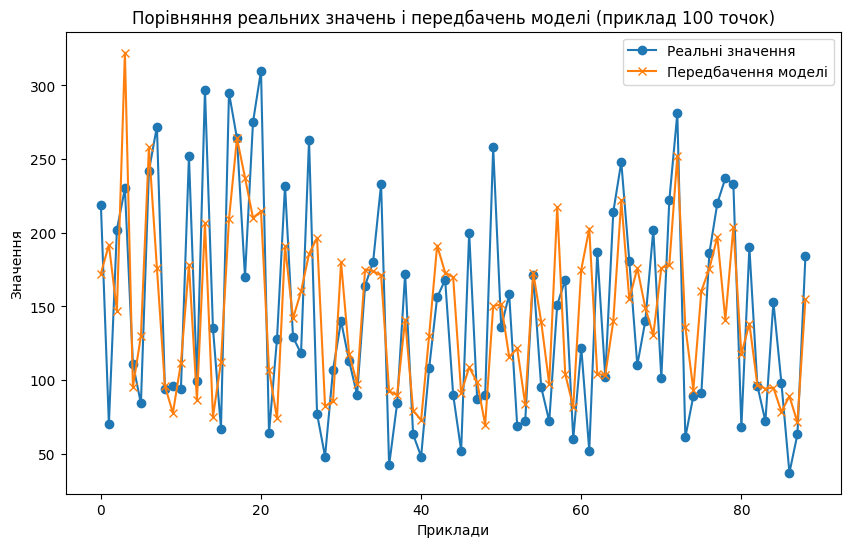

In [11]:
# Передбачення на тестових даних
y_pred = model.predict(X_test)

# Порівняння передбачень і реальних значень
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test[:100], label="Реальні значення", marker='o')
plt.plot(y_pred[:100], label="Передбачення моделі", marker='x')
plt.title("Порівняння реальних значень і передбачень моделі (приклад 100 точок)")
plt.xlabel("Приклади")
plt.ylabel("Значення")
plt.legend()
plt.show()


Судячи з графіка, передбачення моделі (помаранчева лінія) не ідеально, але все +- відповідають реальним значенням (синя лінія). Це вказує на те, що модель навчилася розуміти дані, і прогноз є частично коректним.

###Крок 8: Експерименти

Створимо 2-3 різні архітектури для порівняння

***Архітектура 1: Базова***

Оригінальна модель, яку ми вже створили:

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [19]:
model_base = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
model_base.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


***Архітектура 2: Додаємо ще один прихований шар і більше нейронів:***

In [20]:
model_deep = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
model_deep.compile(optimizer='adam', loss='mse', metrics=['mae'])


***Архітектура 3: Додаємо Dropout для регуляризації:***

In [21]:
from keras.layers import Dropout

model_dropout = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')
])
model_dropout.compile(optimizer='adam', loss='mse', metrics=['mae'])


***3. Навчимо всі три моделі та збережемо історії навчання:***

In [23]:
from sklearn.model_selection import train_test_split

# Розділяємо на навчальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Додатково розділяємо навчальний набір на навчальний і валідаційний
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [24]:
history_base = model_base.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)
history_deep = model_deep.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)
history_dropout = model_dropout.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)


***4. Візуалізуємо, як змінювалися функції втрат (Loss) і Mean Absolute Error (MAE) під час навчання для трьох моделей:***

**Loss (втрати):**

Тренувальні втрати: Скільки модель помиляється на тренувальних даних.

Валідаційні втрати: Як модель поводиться на даних, які вона ще не бачила.

Ідеально, якщо обидві криві (тренувальна та валідаційна) зменшуються і сходяться ближче до нуля, що свідчить про гарне узагальнення.

----------------------------------------------------------------
**MAE (середня абсолютна помилка):**

Схожа логіка: графік тренувальної MAE і валідаційної MAE має зменшуватися з кожною епохою.

Якщо криві розходяться (валідаційна помилка починає рости при зменшенні тренувальної), це сигналізує про перенавчання.

----------------------------------------------------------------
**Порівняння моделей:**

- Base: Базова модель, що є відправною точкою.

- Deep: Глибша модель, має більше шарів або нейронів — може показувати кращі результати, але ризикує перенавчатися.

- Dropout: Модель із регуляризацією Dropout — має менший ризик перенавчання, її криві валідації можуть бути стабільнішими.

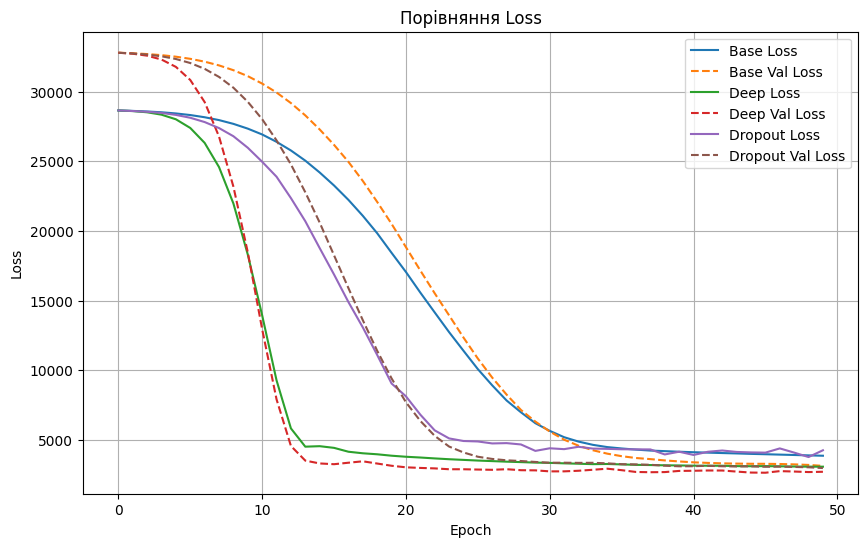

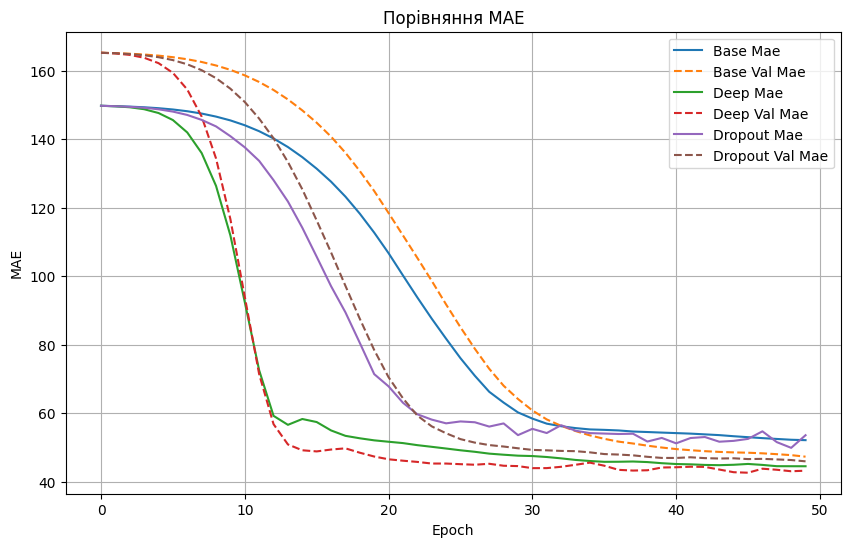

In [25]:
import matplotlib.pyplot as plt

# Функція для побудови графіків
def plot_training(histories, metric, title, ylabel):
    plt.figure(figsize=(10, 6))
    for name, history in histories.items():
        plt.plot(history.history[metric], label=f'{name} {metric.capitalize()}')
        plt.plot(history.history[f'val_{metric}'], linestyle='dashed', label=f'{name} Val {metric.capitalize()}')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    plt.show()

# Збираємо історії
histories = {
    "Base": history_base,
    "Deep": history_deep,
    "Dropout": history_dropout
}

# Побудова графіків
plot_training(histories, 'loss', 'Порівняння Loss', 'Loss')
plot_training(histories, 'mae', 'Порівняння MAE', 'MAE')


***Аналіз наших графіків.***

Можна побачити, що різниця між loss і val_loss невелика, це означає, що модель добре узагальнює (здатна працювати на нових даних).

Також тренувальні (loss, mae) і валідаційні (val_loss, val_mae) метрики +- збігаються, а це означає, що модель не перенавчилась (overfitting) і здатна працювати стабільно на даних, які вона не бачила під час тренування.

##***Висновок***

У цій роботі ми побудували нейронну мережу для вирішення завдання регресії, використовуючи дані з тестового набору. В процесі ми оптимізували архітектуру моделі, експериментували з додаванням шарів, зміною кількості нейронів і функцій активації, а також використовували регуляризацію для запобігання перенавчанню. Графіки метрик тренування (loss, mae) і валідації (val_loss, val_mae) показали, що модель добре узагальнює дані, оскільки значення функцій втрат та похибок у кінці навчання стабільно збігаються. Проведені експерименти підтвердили ефективність оптимізованої архітектури, а також її здатність коректно працювати на невідомих даних, що було підтверджено через тестовий набір. Загалом, ми досягли стабільної та надійної моделі з адекватними результатами прогнозування.

##***Контрольні питання:***

**1. Що таке TensorFlow і Keras? У чому їх основні відмінності та переваги?**

TensorFlow і Keras: TensorFlow — це гнучкий фреймворк для створення та виконання моделей машинного навчання. Keras — високорівнева API, що працює поверх TensorFlow, забезпечуючи простоту у створенні моделей. Перевага TensorFlow — гнучкість і масштабованість, Keras — зручність і швидкість прототипування.

**2. Які етапи потрібно пройти для створення моделі в Keras?**

1. Визначення архітектури моделі (послідовна або функціональна).

2. Компіляція (вибір оптимізатора, функції втрат, метрик).

3. Навчання (fit()), використовуючи тренувальні дані.

4. Оцінка якості (evaluate()) на тестових даних.

5. Прогнозування (predict()).

**3. Що таке задача регресії? Наведіть приклади.**

Це задача передбачення безперервного числового значення. Приклади: передбачення ціни будинку, кількості продажів, температури.

**4. Які метрики використовуються для оцінки якості моделі в задачах регресії?**

- MAE (Mean Absolute Error).
- MSE (Mean Squared Error).
- RMSE (Root Mean Squared Error).
- R² (коефіцієнт детермінації).

**5. Як функції активації впливають на роботу нейронної мережі?**

Вони додають нелінійність у нейронну мережу, дозволяючи моделі вивчати складні взаємозв’язки. Наприклад, ReLU активує тільки позитивні значення, Sigmoid і Softmax використовуються для класифікації.

**6. Чому важливо розподіляти дані на тренувальний та тестовий набори?**

 Це важливо для перевірки узагальнюючої здатності моделі. Тренувальний набір навчає модель, тестовий оцінює її продуктивність на невідомих даних.